<a href="https://colab.research.google.com/github/czapata-ande/ai-frameworks/blob/main/Copia_de_RPredicSTProfetCmetricSolarEspa_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Disabling yearly seasonality. Run prophet with yearly.seasonality=TRUE to override this.



,ds,trend,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat_lower,yhat_upper,trend_lower,trend_upper,yhat
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2015-01-01 00:00:00,1547.459,-1106.178,-1106.178,-1106.178,-1136.092,-1136.092,-1136.092,29.91450,29.91450,29.91450,0,0,0,-1223.818,2182.045,1547.459,1547.459,441.2812
2,2015-01-01 01:00:00,1546.398,-1174.771,-1174.771,-1174.771,-1201.541,-1201.541,-1201.541,26.76986,26.76986,26.76986,0,0,0,-1175.700,2089.572,1546.398,1546.398,371.6265
3,2015-01-01 02:00:00,1545.337,-1189.790,-1189.790,-1189.790,-1213.245,-1213.245,-1213.245,23.45540,23.45540,23.45540,0,0,0,-1277.114,2137.441,1545.337,1545.337,355.5466
4,2015-01-01 03:00:00,1544.275,-1154.913,-1154.913,-1154.913,-1174.918,-1174.918,-1174.918,20.00492,20.00492,20.00492,0,0,0,-1196.482,2046.174,1544.275,1544.275,389.3625
5,2015-01-01 04:00:00,1543.214,-1154.591,-1154.591,-1154.591,-1171.045,-1171.045,-1171.045,16.45425,16.45425,16.45425,0,0,0,-1280.554,2055.412,1543.214,1543.214,388.6233
6,2015-01-01 05:00:00,1542.153,-1249.125,-1249.125,-1249.125,-1261.966,-1261.966,-1261.966,12.84087,12.84087,12.84087,0,0,0,-1378.150,1860.772,1542.153,1542.153,293.0280


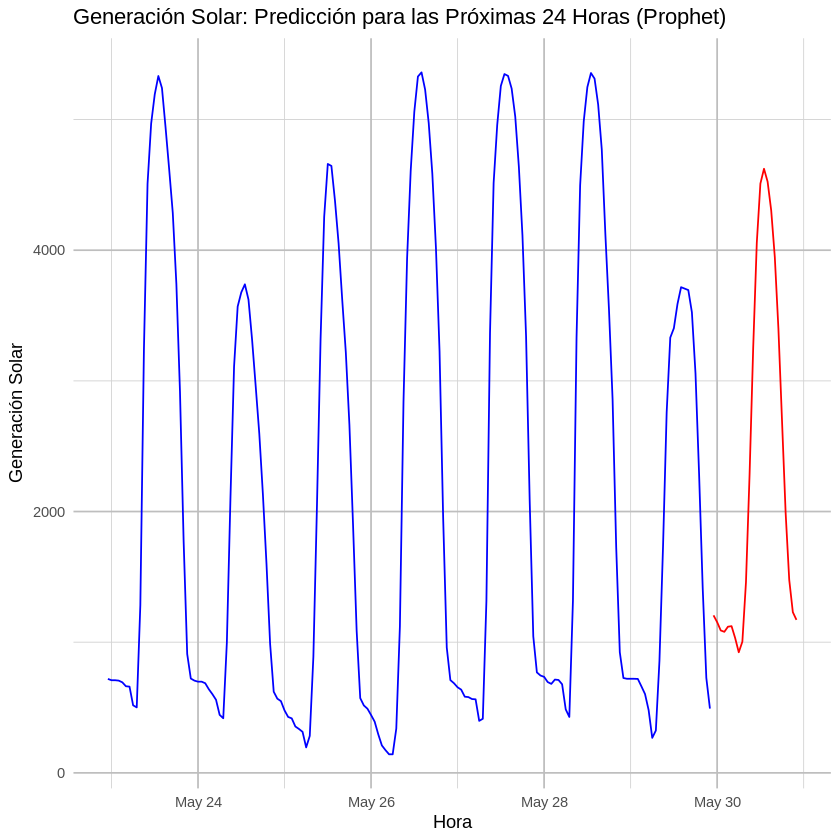

Métricas de Evaluación (Prophet):
RMSE: 581.3884 
MSE: 338012.5 
MAE: 529.2761 
R2: 0.9341822 


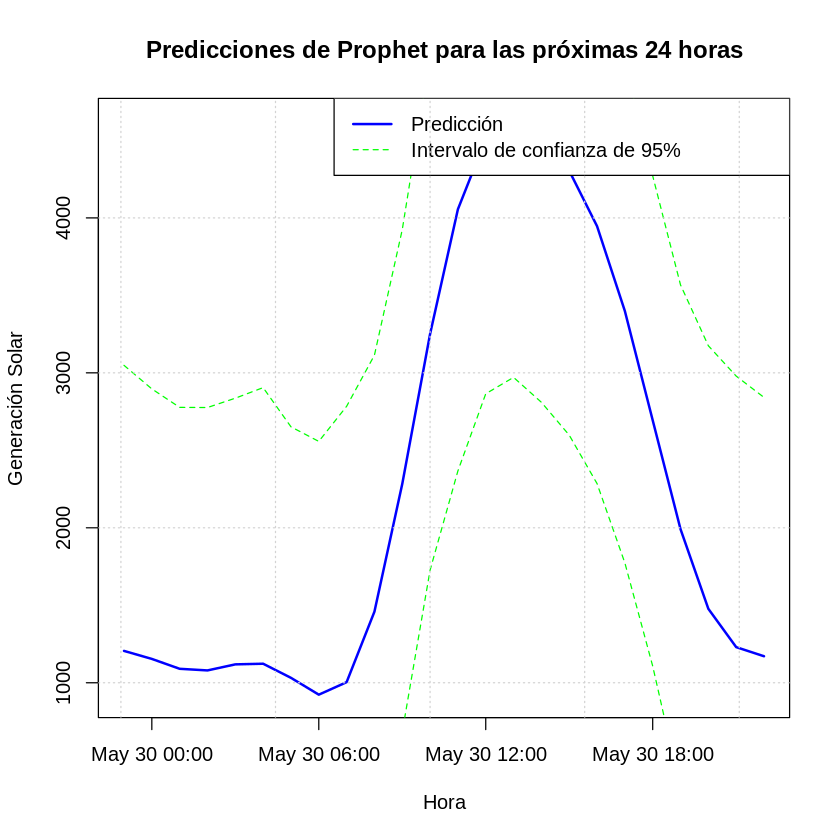

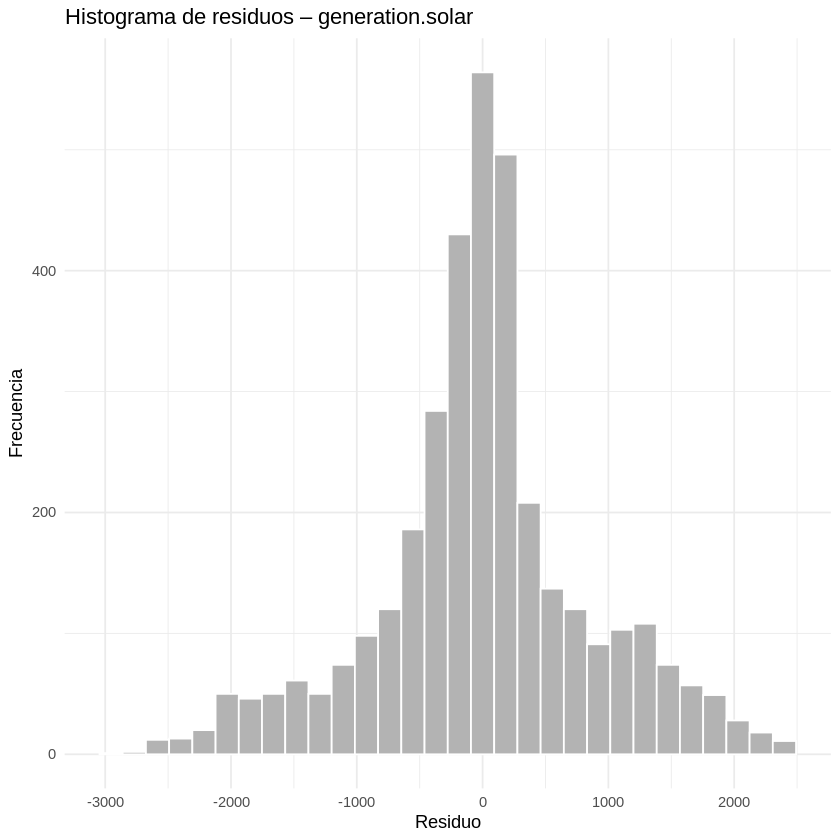

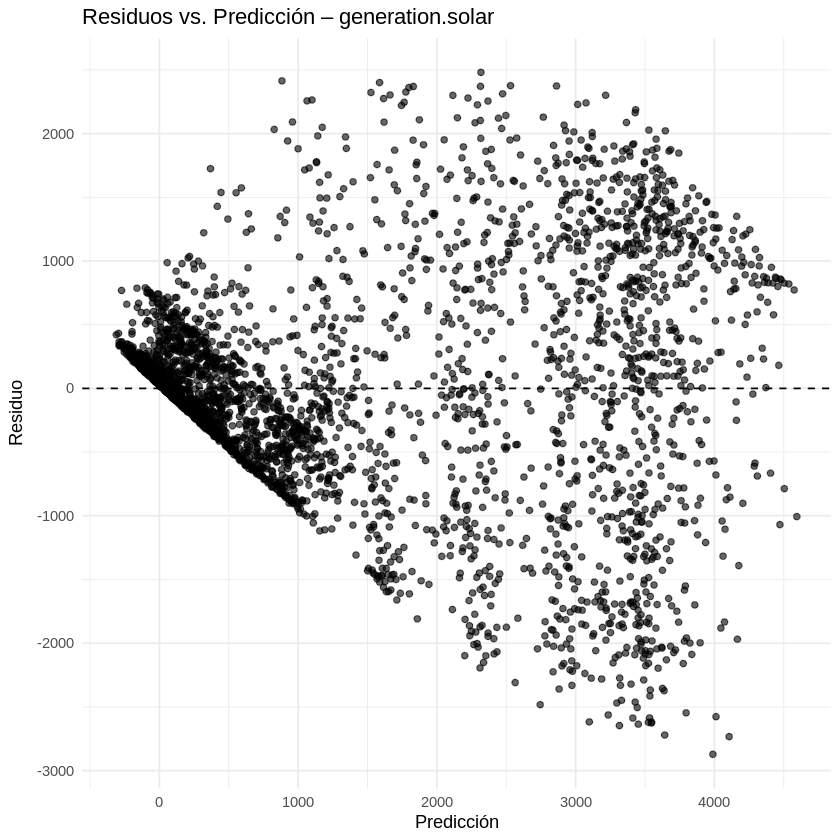

In [3]:
# ADVERTENCIA: Si va ejecutarlo en el Colab, cambie el Ambiente de Ejecución para R
# Instalar las librerías necesarias (si no están instaladas)
install.packages(c("forecast", "prophet", "dplyr")) # Install if needed

# Librerías necesarias
library(prophet)
library(ggplot2)
library(dplyr) # Added dplyr based on install suggestion

# Leer y preparar los datos desde la URL
url1 <- "https://raw.githubusercontent.com/vneumannufprbr/TrabajosRStudio/main/energy_dataset.csv" # Dataset con 3.500 instancias
 data<- read.csv(url1, stringsAsFactors = FALSE)

#url <-  "https://raw.githubusercontent.com/vneumannufprbr/Series-Temporales/main/energy_dataset.csv" # Dataset con 35.000 instancias
#data <- read.csv(url) # Dataset con 35.000 instancias # dtype=dtype_dict,

# Leer los datos desde el computador
# data <- read.csv("Practica-Prediccion-Series-Temporales/energy_dataset.csv")

# Convertir la columna de tiempo al formato adecuado
data$time <- as.POSIXct(data$time, format="%Y-%m-%d %H:%M:%S", tz="UTC")

# Renombrar columnas para adecuarse al formato de Prophet
prophet_data <- data.frame(ds = data$time, y = data$generation.solar)

# Eliminar filas con valores nulos
prophet_data <- na.omit(prophet_data)

# Ajustar el modelo Prophet
model <- prophet(prophet_data,interval.width = 0.95)

# Crear un dataframe para las próximas 24 horas
future <- make_future_dataframe(model, periods = 24, freq = "hour")

# Hacer las predicciones para las próximas 24 horas
forecast_prophet <- predict(model, future)

# Mostrar las primeras filas de las predicciones
head(forecast_prophet)

# Filtrar las predicciones para las próximas 24 horas
next_24_hours <- tail(forecast_prophet, 24)

# Crear dataframe para graficar las predicciones
df_forecast_prophet <- data.frame(
  time = next_24_hours$ds,
  generation.solar = next_24_hours$yhat
)

# Graficar los últimos 7 días de datos históricos y las predicciones para las próximas 24 horas
ggplot() +
  geom_line(data = tail(data, 7*24), aes(x = time, y = generation.solar), color = "blue") +  # Últimos 7 días de datos históricos
  geom_line(data = df_forecast_prophet, aes(x = time, y = generation.solar), color = "red") +  # Predicciones de 24 horas
  labs(title = "Generación Solar: Predicción para las Próximas 24 Horas (Prophet)",
       x = "Hora", y = "Generación Solar") +
  theme_minimal() + # Apply theme here
  theme(panel.grid.major = element_line(color = "grey", linewidth = 0.5),  # Personalizar la cuadrícula, use linewidth
        panel.grid.minor = element_line(color = "lightgrey", linewidth = 0.25))  # Cuadrícula menor, use linewidth


# Visualizar las predicciones con Intervalo de confianza para las próximas 24 horas
plot(next_24_hours$ds, next_24_hours$yhat, type = "l", col = "blue", lwd = 2,
     xlab = "Hora", ylab = "Generación Solar",
     main = "Predicciones de Prophet para las próximas 24 horas")
lines(next_24_hours$ds, next_24_hours$yhat_lower, col = "green", lty = 2)
lines(next_24_hours$ds, next_24_hours$yhat_upper, col = "green", lty = 2)
legend("topright", legend = c("Predicción", "Intervalo de confianza de 95%"),
       col = c("blue", "green"), lty = c(1, 2), lwd = c(2, 1))
grid()

# Cálculo y Visualización de métricas

# Extraer los valores reales para el período de predicción (las últimas 24 horas de los datos históricos)
historical_actual_prophet <- tail(prophet_data$y, 24)

# Extraer los valores predichos de las predicciones de Prophet
forecasted_values_prophet <- tail(forecast_prophet$yhat, 24)

# Instalar el paquete Metrics si no está instalado
if (!requireNamespace("Metrics", quietly = TRUE)) {
  install.packages("Metrics")
}

# Cargar el paquete Metrics
library(Metrics)

# Verificar que las longitudes coincidan
if (length(historical_actual_prophet) == length(forecasted_values_prophet)) {
  # Calcular las métricas de evaluación para Prophet
  rmse_prophet <- Metrics::rmse(historical_actual_prophet, forecasted_values_prophet)
  mse_prophet <- Metrics::mse(historical_actual_prophet, forecasted_values_prophet)
  mae_prophet <- Metrics::mae(historical_actual_prophet, forecasted_prophet)
  # Calcular R2 para Prophet
  r2_prophet <- cor(historical_actual_prophet, forecasted_values_prophet)^2

  # Imprimir los resultados
  cat("Métricas de Evaluación (Prophet):\n")
  cat("RMSE:", rmse_prophet, "\n")
  cat("MSE:", mse_prophet, "\n")
  cat("MAE:", mae_prophet, "\n")
  cat("R2:", r2_prophet, "\n")
} else {
  cat("Error: Las longitudes de los datos históricos y las predicciones de Prophet no coinciden para la evaluación.\n")
  cat("Longitud de datos históricos:", length(historical_actual_prophet), "\n")
  cat("Longitud de predicciones de Prophet:", length(forecasted_values_prophet), "\n")
}

# Gráficos de Residuos
library(dplyr)
library(ggplot2)

# Predicciones sobre TODO el histórico (mismo modelo ya entrenado)
# Ensure the ds column is in the correct format and handle NAs before prediction
hist_future <- data.frame(ds = as.POSIXct(prophet_data$ds, format="%Y-%m-%d %H:%M:%S", tz="UTC")) # Create a dataframe with ds column and ensure format
hist_future <- hist_future %>% filter(!is.na(ds)) # Remove rows with NA in ds

hist_forecast <- predict(model, hist_future)

# Unimos y calculamos residuos
df_res <- prophet_data %>%
  left_join(hist_forecast %>% select(ds, yhat), by = "ds") %>%
  mutate(
    pred  = yhat,
    resid = y - yhat
  ) %>%
  filter(is.finite(resid), is.finite(pred))

# --- Gráficos ---
# Histograma
ggplot(df_res, aes(x = resid)) +
  geom_histogram(bins = 30, fill = "gray70", color = "white") +
  labs(title = "Histograma de residuos – generation.solar",
       x = "Residuo", y = "Frecuencia") +
  theme_minimal()

# Dispersión residuos vs predicho
ggplot(df_res, aes(x = pred, y = resid)) +
  geom_point(alpha = 0.6) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(title = "Residuos vs. Predicción – generation.solar",
       x = "Predicción", y = "Residuo") +
  theme_minimal()